In [ ]:
## Arrows
# Steps and thresholds to sparse the arrows
arrow_step = 80
# threshold_dx = 1.0
# threshold_dy = 0.003

# def moving_average(data, window_size):
#     return np.convolve(data, np.ones(window_size) / window_size, mode='valid')
# # Remove noise
# window_size = 20
# smoothed_x_sim = moving_average(x_sim, window_size)
# smoothed_y_sim = moving_average(y_sim, window_size)

# dx = np.diff(smoothed_x_sim)
# dy = np.diff(smoothed_y_sim)

# # Mask to filter and get only transients
# arrow_mask = (np.abs(dx) > threshold_dx) | (np.abs(dy) > threshold_dy)
# arrow_mask = np.concatenate((np.zeros(window_size), arrow_mask))
# arrow_mask = np.cumsum(arrow_mask[::-1]) > 0
# arrow_mask = arrow_mask[::-1]

# arrow_x_vec = x_sim[arrow_mask]
# arrow_y_vec = y_sim[arrow_mask]

# arrow_dx_vec = dx[arrow_mask[window_size:]]
# arrow_dy_vec = dy[arrow_mask[window_size:]]

# arrow_x_vec = arrow_x_vec[::arrow_step]
# arrow_y_vec = arrow_y_vec[::arrow_step]
# arrow_dx_vec = arrow_dx_vec[::arrow_step]
# arrow_dy_vec = arrow_dy_vec[::arrow_step]

KeyboardInterrupt: 

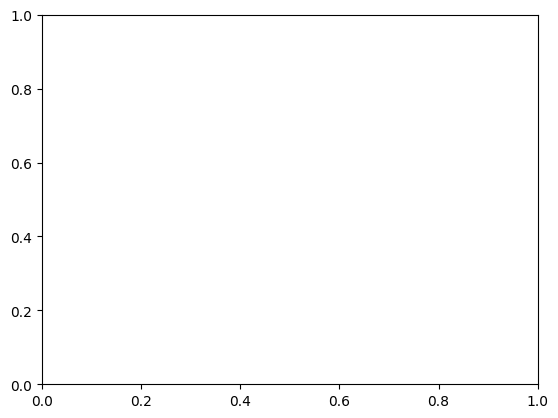

In [ ]:
# import numpy as np
# import phaseportrait

# def pendulum(x, y):
#     x_dot = np.cos(y)
#     y_dot = np.sin(x)
#     return x_dot, y_dot

# SimplePendulum = phaseportrait.PhasePortrait2D(pendulum, [-9, 9], Title='Simple pendulum', xlabel=r"$\Theta$", ylabel=r"$\dot{\Theta}$")
# SimplePendulum.plot()


In [4]:
import pandas as pd
import numpy as np

current_time = 10
m = 2
pred_time = 10
discret_time = 2
K = int(pred_time / discret_time)
time_index = np.arange(current_time, current_time + K * discret_time, discret_time)
time_index = np.hstack((current_time - discret_time, time_index))
print(time_index.shape)
open_loop = pd.DataFrame(np.random.rand(K+1, m), columns=['I_HP', 'x_FAN'], index=time_index)
open_loop = pd.DataFrame(np.zeros((K+1, m)), columns=['I_HP', 'x_FAN'], index=time_index)
display(open_loop)
current_time = 13
# Take the first row where the time is greater than the current time
succ = open_loop.loc[open_loop.index >= current_time].iloc[0]
display(succ.to_numpy().reshape(-1, 1))
# Take the previous row for a time greater than the current time
prev = open_loop.loc[open_loop.index <= current_time].iloc[-1]
display(prev.to_numpy().reshape(-1, 1))
# interpolate based on time index
# interpolated = TODO with fractions () / () * ... + ...
# Add the current time to the index for interpolation
open_loop_with_current = open_loop.copy()
open_loop_with_current.loc[current_time] = np.nan

# Sort the index to ensure proper interpolation
open_loop_with_current = open_loop_with_current.sort_index()

# Perform interpolation
open_loop_interpolated = open_loop_with_current.interpolate(method='index')

# Get the interpolated values at the current time
interpol = open_loop_interpolated.loc[current_time]
display(interpol.to_numpy().reshape(-1, 1))


(6,)


,I_HP,x_FAN
8,0.0,0.0
10,0.0,0.0
12,0.0,0.0
14,0.0,0.0
16,0.0,0.0
18,0.0,0.0


array([[0.],
       [0.]])

array([[0.],
       [0.]])

array([[0.],
       [0.]])

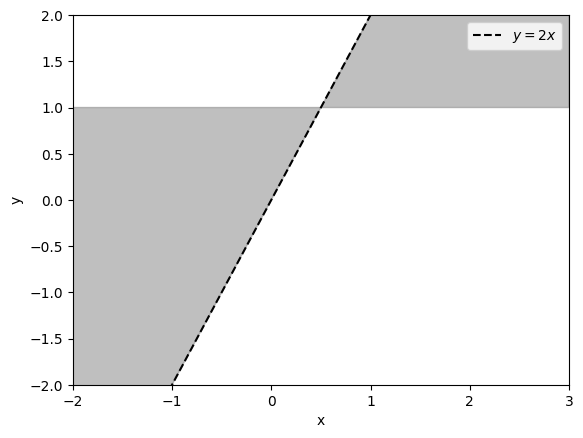

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Sample figure
fig, ax = plt.subplots()

# Line equation y = 2x
x = np.linspace(-2, 3, 500)
y = 2 * x
ax.plot(x, y, color='black', linestyle='--', label=r'$y = 2x$')

# Define x limits for left and right halves
x_left, x_right = -2, 3

# Fill the region below y = 2x (left of the line)
ax.fill_between(x, y, 1, color='gray', alpha=0.5)

# Adjust limits and labels
ax.set_xlim(x_left, x_right)
ax.set_ylim(-2, 2)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend()

plt.show()


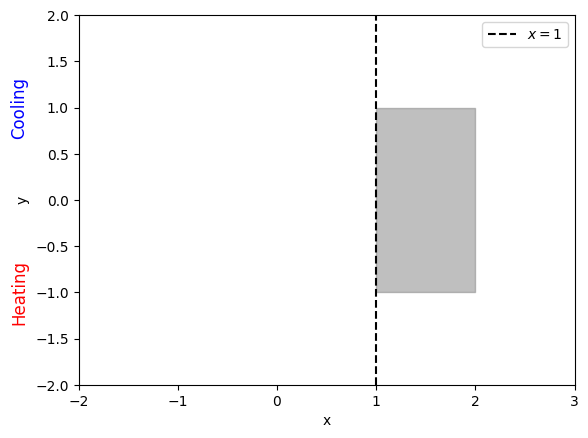

In [6]:
import matplotlib.pyplot as plt

# Sample figure
fig, ax = plt.subplots()

# Vertical line at x = 1
x = 1
ax.axvline(x=x, color='black', linestyle='--', label=r'$x = 1$')

# Define y limits for top and bottom halves
y_bottom, y_top = -2, 2

# Fill the left region (gray) for x < 1
ax.fill_betweenx([-1, 1], 2, x, color='gray', alpha=0.5)

ax.text(-2.6, 1, "Cooling", fontsize=12, ha='center', va='center', rotation=90, color='blue')
ax.text(-2.6, -1, "Heating", fontsize=12, ha='center', va='center', rotation=90, color='red')


# Adjust limits and labels
ax.set_xlim(-2, 3)
ax.set_ylim(y_bottom, y_top)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend()

plt.show()

In [2]:
import numpy as np
num_traj_1 = 1
P_rad_vec = np.linspace(0.2, 1, num_traj_1)
print(P_rad_vec)

num_traj_2 = 7
T_amb_vec = np.linspace(13.0, 49.0, num=num_traj_2)
print(T_amb_vec)

[0.2]
[13. 19. 25. 31. 37. 43. 49.]


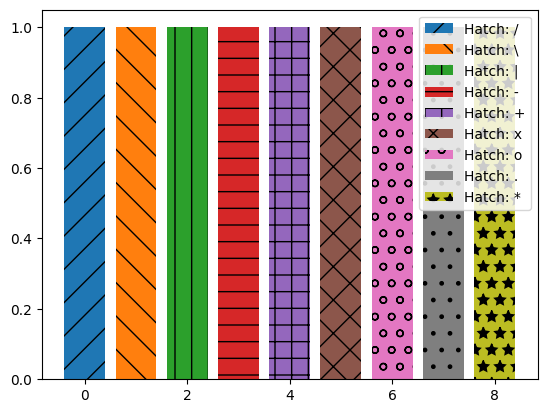

In [1]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

# Example bars with different hatches
patterns = ['/', '\\', '|', '-', '+', 'x', 'o', '.', '*']
for i, pattern in enumerate(patterns):
    ax.bar(i, 1, hatch=pattern, label=f"Hatch: {pattern}")

ax.legend()
plt.show()


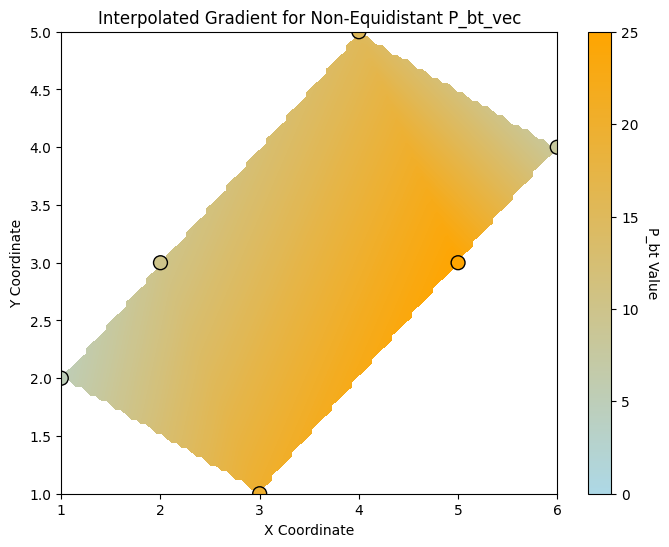

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap, Normalize
from scipy.interpolate import griddata

# Define the colormap and normalization
color_gradient_P_bt = ["lightblue", "orange"]
cmap_tracked_P_bt = LinearSegmentedColormap.from_list("P_bt_scale", color_gradient_P_bt)
norm_tracked_P_bt = Normalize(vmin=0, vmax=25)

# Define the matrix of P_bt_vec (x, y, P_bt)
P_bt_vec = np.array([
    [1, 2, 5],
    [2, 3, 10],
    [3, 1, 20],
    [4, 5, 15],
    [5, 3, 25],
    [6, 4, 8]
])

x, y, P_bt = P_bt_vec[:, 0], P_bt_vec[:, 1], P_bt_vec[:, 2]

# Create a meshgrid for interpolation
grid_x, grid_y = np.meshgrid(
    np.linspace(x.min(), x.max(), 100),
    np.linspace(y.min(), y.max(), 100)
)

# Interpolate the P_bt values onto the grid
grid_P_bt = griddata((x, y), P_bt, (grid_x, grid_y), method='linear')

# Plot the interpolated data
plt.figure(figsize=(8, 6))
plt.contourf(grid_x, grid_y, grid_P_bt, levels=100, cmap=cmap_tracked_P_bt, norm=norm_tracked_P_bt)

# Overlay the original P_bt_vec
plt.scatter(x, y, c=P_bt, cmap=cmap_tracked_P_bt, norm=norm_tracked_P_bt, edgecolor='k', s=100)

# Add a colorbar
cbar = plt.colorbar()
cbar.set_label('P_bt Value', rotation=270, labelpad=15)

# Set labels and title
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.title("Interpolated Gradient for Non-Equidistant P_bt_vec")

# Show the plot
plt.show()


In [5]:
import math

print(int(6.4))
print(math.ceil(6.4))
print(math.floor(6.4))

6
7
6


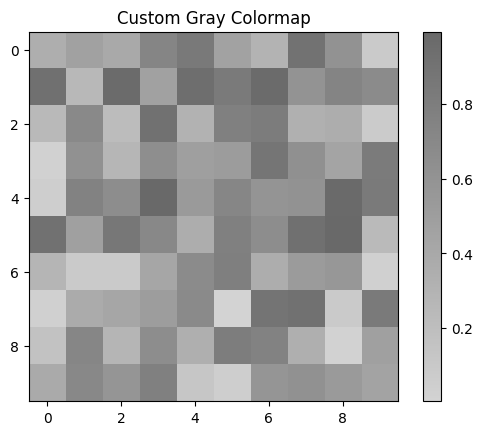

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

# Define the colormap
colors = ["lightgray", "darkgray"]

colors = ["#D3D3D3", "#696969"]  # Lighter gray (#D3D3D3) to darker gray (#696969)
cmap = LinearSegmentedColormap.from_list("gray_scale", colors)

# Example data
data = np.random.rand(10, 10)

# Plotting with the custom colormap
plt.imshow(data, cmap=cmap)
plt.colorbar()
plt.title("Custom Gray Colormap")
plt.show()


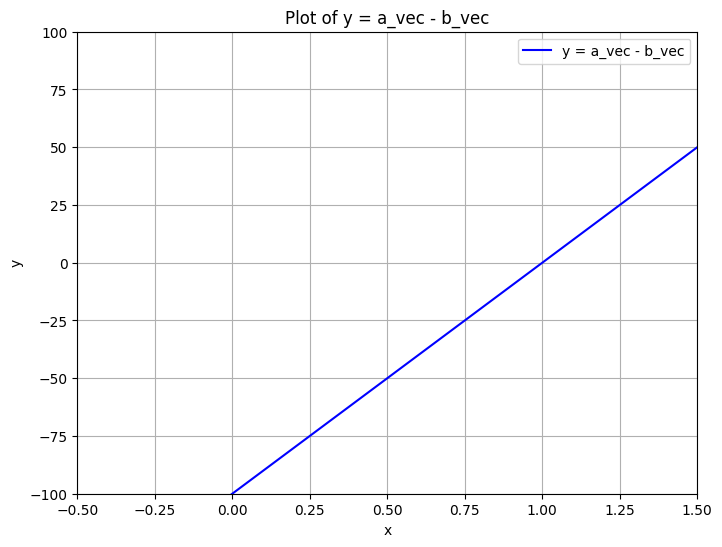

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define x-axis range
x = np.linspace(-0.5, 1.5, 500)

# Define a_vec (constant) and b_vec
b_vec = 50  # Constant value for a_vec
a_vec = np.linspace(-100, 100, 500)  # Range for b_vec matching the x-axis size

# Calculate y-axis values: y = a_vec - b_vec
y = a_vec - b_vec

# Plot the line
plt.figure(figsize=(8, 6))
plt.plot(x, y, label='y = a_vec - b_vec', color='blue')

# Set axis limits
plt.xlim(-0.5, 1.5)
plt.ylim(-100, 100)

# Add labels, title, and legend
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of y = a_vec - b_vec')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()
